In [1]:
import cv2
import mediapipe as mp
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [2]:
import random
from itertools import count
from matplotlib.animation import FuncAnimation
import time
import psutil
import matplotlib.pyplot as plt
import random
from itertools import count
from matplotlib.animation import FuncAnimation
plt.style.use('fivethirtyeight')

In [3]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'


In [6]:
# TRACKING THE HANDS
L_shoulder_array=[]
L_elbow_array=[]
L_wrist_array=[]
R_shoulder_array=[]
R_elbow_array=[]
R_wrist_array=[]


tabx1 = []
taby1 = []

tabx2 = []
taby2 = []

tabx3 = []
taby3 = []

tabx4 = []
taby4 = []

tabx5 = []
taby5 = []

tabx6 = []
taby6 = []

cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            
            #Left Hand
            L_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            L_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            L_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #Right Hand
            
            R_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            R_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            R_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            
            
            # Putting coordinates in to arrays
            
            #Left Hand
            
            L_shoulder_array.append(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)
            L_elbow_array.append(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x)
            L_wrist_array.append(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x)
            tabx1 = L_shoulder_array
            tabx2 = L_elbow_array
            tabx3 = L_wrist_array
            #Right Hand
            
            R_shoulder_array.append(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x)
            R_elbow_array.append(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x)
            R_wrist_array.append(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x)
            
            tabx4 = R_shoulder_array
            tabx5 = R_elbow_array
            tabx6 = R_wrist_array
            
            taby1.append(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y) 
            taby2.append(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y) 
            taby3.append(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y) 
            taby4.append(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y) 
            taby5.append(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y) 
            taby6.append(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y) 
             
            
            
            
            
            # Calculate angle
#             angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize coordinates on the screen
            
            #Left Hand
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x*10), 
                           tuple(np.multiply(L_shoulder, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x*10), 
                           tuple(np.multiply(L_elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x*10), 
                           tuple(np.multiply(L_wrist, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            
            #Right Hand
            
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x*10), 
                           tuple(np.multiply(R_shoulder, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x*10), 
                           tuple(np.multiply(R_elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            cv2.putText(image, str(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x*10), 
                           tuple(np.multiply(R_wrist, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                )
            
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    
# plotter(shoulder_array)
# plotter(elbow_array)
# plotter(wrist_array)


# GRAPH FOR COORDINATES 

<IPython.core.display.Javascript object>


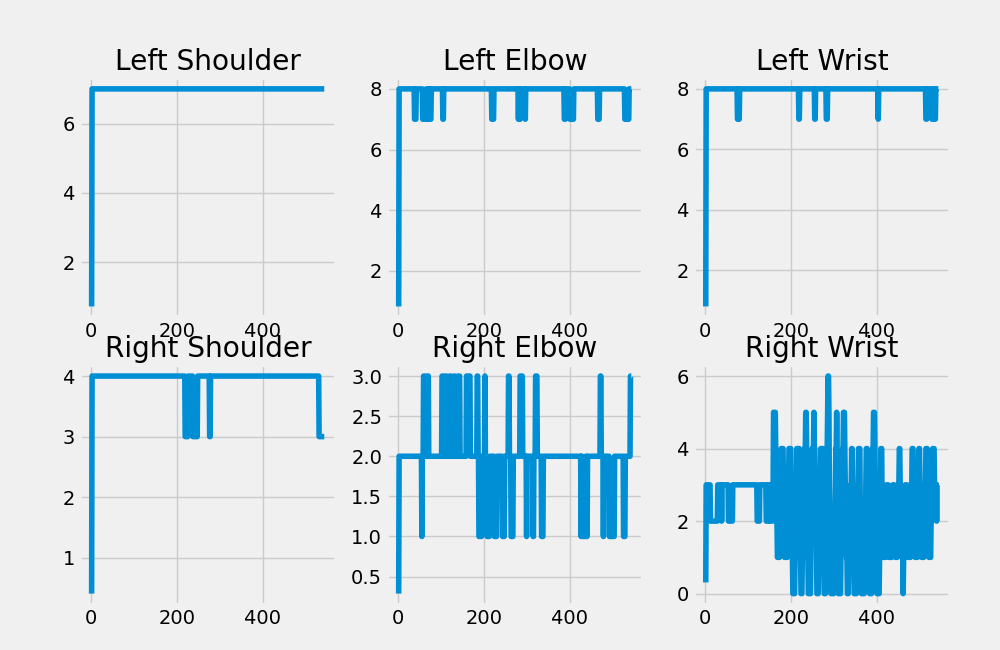

In [7]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math


string1 ="Left Shoulder"
x1 = L_shoulder_array
y1 = []
for i in range(1,len(x1)):
    x1[i] = math.floor(x1[i]*10)
    y1.append(i)
y1.append(y1[-1]+1)
arrx1 = np.array(x1)
arry1 = np.array(y1)



string2 ="Left Elbow"
x2 = L_elbow_array
y2 = []
for i in range(1,len(x2)):
    x2[i] = math.floor(x2[i]*10)
    y2.append(i)
y2.append(y2[-1]+1)
arrx2 = np.array(x2)
arry2 = np.array(y2)


string3 ="Left Wrist"
x3 = L_wrist_array
y3 = []
for i in range(1,len(x3)):
    x3[i] = math.floor(x3[i]*10)
    y3.append(i)
y3.append(y3[-1]+1)
arrx3 = np.array(x3)
arry3 = np.array(y3)




string4 ="Right Shoulder"
x4 = R_shoulder_array
y4 = []
for i in range(1,len(x4)):
    x4[i] = math.floor(x4[i]*10)
    y4.append(i)
y4.append(y4[-1]+1)
arrx4 = np.array(x4)
arry4 = np.array(y4)



string5 ="Right Elbow"
x5 = R_elbow_array
y5 = []
for i in range(1,len(x5)):
    x5[i] = math.floor(x5[i]*10)
    y5.append(i)
y5.append(y5[-1]+1)
arrx5 = np.array(x5)
arry5 = np.array(y5)


string6 ="Right Wrist"
x6 = R_wrist_array
y6 = []
for i in range(1,len(x6)):
    x6[i] = math.floor(x6[i]*10)
    y6.append(i)
y6.append(y6[-1]+1)
arrx6 = np.array(x6)
arry6 = np.array(y6)



# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2,3)

# For Sine Function
axis[0, 0].plot(arry1 , arrx1)
axis[0, 0].set_title(string1)

# For Cosine Function
axis[0,1].plot(arry2 , arrx2)
axis[0,1].set_title(string2)

# For Tangent Function
axis[0, 2].plot(arry3 , arrx3)
axis[0, 2].set_title(string3)

# For Tanh Function
axis[1, 0].plot(arry4 , arrx4)
axis[1, 0].set_title(string4)

axis[1, 1].plot(arry5 , arrx5)
axis[1, 1].set_title(string5)

axis[1, 2].plot(arry6 , arrx6)
axis[1, 2].set_title(string6)


# Combine all the operations and display
plt.show()


# Tabular Column For Coordinates 

# Left Shoulder

In [ ]:
dict = {'x-Coordinate': tabx1, 'y-Coordinate': taby1}  
df = pd.DataFrame(dict) 
print(df) 



# Left Elbow

In [ ]:
dict = {'x-Coordinate': tabx2, 'y-Coordinate': taby2}  
df = pd.DataFrame(dict) 
print(df) 

# Left Wrist

In [8]:
dict = {'x-Coordinate': tabx1, 'y-Coordinate': taby1}  
df = pd.DataFrame(dict) 
print(df) 

     x-Coordinate  y-Coordinate
0        0.730437      0.815455
1        7.000000      0.815468
2        7.000000      0.815418
3        7.000000      0.815096
4        7.000000      0.814626
..            ...           ...
538      7.000000      0.791368
539      7.000000      0.790786
540      7.000000      0.790983
541      7.000000      0.791115
542      7.000000      0.790812

[543 rows x 2 columns]


# Right Shoulder

In [ ]:
dict = {'x-Coordinate': tabx1, 'y-Coordinate': taby1}  
df = pd.DataFrame(dict) 
print(df) 

# Right Elbow

In [ ]:
dict = {'x-Coordinate': tabx1, 'y-Coordinate': taby1}  
df = pd.DataFrame(dict) 
print(df) 

# Right Wrist

In [ ]:
dict = {'x-Coordinate': tabx1, 'y-Coordinate': taby1}  
df = pd.DataFrame(dict) 
print(df) 

In [25]:
# mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)